In [2]:
# compute the time of observation (TOBS) for stations

In [278]:
# import libraries
%matplotlib inline
import numpy as np
#import csv
import matplotlib.pyplot as plt
import pandas as pd
import glob
import ulmo
import os
import scipy.spatial

def hw_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [3]:
ghcn = pd.read_fwf('data/ghcnd-stations.txt', colspecs = [(0,11), (12,19), (21,29), (31,36),(38,40), (41,70), (72,74),(76,78),(80,85)], header = None) 
colnames = ['GHCN ID', 'lat', 'lon', 'elevation', 'state', 'name', 'gsn flag', 'HCN/CRN FLAG', 'WMO ID']
ghcn.columns = colnames

# append the brightness index 
BI = np.load('data/brightnessGHCN.npy')
ghcn['Brightness'] = BI
# from http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt
# FORMAT OF "ghcnd-stations.txt"
#
# ------------------------------
# Variable   Columns   Type
# ------------------------------
# ID            1-11   Character
# LATITUDE     13-20   Real
# LONGITUDE    22-30   Real
# ELEVATION    32-37   Real
# STATE        39-40   Character
# NAME         42-71   Character
# GSN FLAG     73-75   Character
# HCN/CRN FLAG 77-79   Character
# WMO ID       81-85   Character
# ------------------------------

# These variables have the following definitions:

# ID         is the station identification code.  Note that the first two
#            characters denote the FIPS  country code, the third character 
#            is a network code that identifies the station numbering system 
#            used, and the remaining eight characters contain the actual 
#            station ID. 

#            See "ghcnd-countries.txt" for a complete list of country codes.
# 	   See "ghcnd-states.txt" for a list of state/province/territory codes.

#            The network code  has the following five values:

#            0 = unspecified (station identified by up to eight 
# 	       alphanumeric characters)
# 	   1 = Community Collaborative Rain, Hail,and Snow (CoCoRaHS)
# 	       based identification number.  To ensure consistency with
# 	       with GHCN Daily, all numbers in the original CoCoRaHS IDs
# 	       have been left-filled to make them all four digits long. 
# 	       In addition, the characters "-" and "_" have been removed 
# 	       to ensure that the IDs do not exceed 11 characters when 
# 	       preceded by "US1". For example, the CoCoRaHS ID 
# 	       "AZ-MR-156" becomes "US1AZMR0156" in GHCN-Daily
#            C = U.S. Cooperative Network identification number (last six 
#                characters of the GHCN-Daily ID)
# 	   E = Identification number used in the ECA&D non-blended
# 	       dataset
# 	   M = World Meteorological Organization ID (last five
# 	       characters of the GHCN-Daily ID)
# 	   N = Identification number used in data supplied by a 
# 	       National Meteorological or Hydrological Center
# 	   R = U.S. Interagency Remote Automatic Weather Station (RAWS)
# 	       identifier
# 	   S = U.S. Natural Resources Conservation Service SNOwpack
# 	       TELemtry (SNOTEL) station identifier
#            W = WBAN identification number (last five characters of the 
#                GHCN-Daily ID)

# LATITUDE   is latitude of the station (in decimal degrees).

# LONGITUDE  is the longitude of the station (in decimal degrees).

# ELEVATION  is the elevation of the station (in meters, missing = -999.9).


# STATE      is the U.S. postal code for the state (for U.S. stations only).

# NAME       is the name of the station.

# GSN FLAG   is a flag that indicates whether the station is part of the GCOS
#            Surface Network (GSN). The flag is assigned by cross-referencing 
#            the number in the WMOID field with the official list of GSN 
#            stations. There are two possible values:

#            Blank = non-GSN station or WMO Station number not available
#            GSN   = GSN station 

# HCN/      is a flag that indicates whether the station is part of the U.S.
# CRN FLAG  Historical Climatology Network (HCN).  There are three possible 
#           values:

#            Blank = Not a member of the U.S. Historical Climatology 
# 	           or U.S. Climate Reference Networks
#            HCN   = U.S. Historical Climatology Network station
# 	   CRN   = U.S. Climate Reference Network or U.S. Regional Climate 
# 	           Network Station

# WMO ID     is the World Meteorological Organization (WMO) number for the
#            station.  If the station has no WMO number (or one has not yet 
# 	   been matched to this station), then the field is blank.

# --------------------------------------------------------------------------------
# --------------------------------------------------------------------------------

In [4]:
pairs = pd.read_csv('NovUSpairs_stationlengths_stationavailability75.csv')
paired_df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]
paired_df = paired_df.drop(2)

drop_cities = ['Mesa','Long Beach', 'Grand Prairie', 'St. Petersburg', 'Virginia Beach', 'St. Paul' ]
paired_df = paired_df.set_index(paired_df['City']).drop(drop_cities)

In [5]:
paired_df.head()

,Unnamed: 0,City,Urban station,Urban Lat,Urban Lon,Urban brightness,Urban start,Urban end,Rural station,Rural Lat,Rural Lon,Rural brightness,Rural start,Rural end
City,,,,,,,,,,,,,,
Hartford,11,Hartford,USW00014752,41.736,-72.650,62.0,1920-01-01,2016-09-30,USC00065445,41.972,-73.220,7.0,1884-11-01 00:00:00,2016-10-31
Providence,12,Providence,USW00014765,41.721,-71.432,62.0,1948-01-01,2016-09-30,USC00375270,41.856,-71.733,12.0,1974-10-01,2016-07-31
Birmingham,13,Birmingham,USW00013876,33.565,-86.745,63.0,1930-01-01,2016-09-30,USC00010505,33.452,-87.357,7.0,1957-02-01,2016-07-31
Oakland,16,Oakland,USC00046336,37.798,-122.264,63.0,1970-10-01,2016-10-31,USC00045915,37.879,-121.930,9.0,1952-04-01,2016-09-30
West Palm Beach,17,West Palm Beach,USW00012844,26.684,-80.099,63.0,1938-07-01,2016-09-30,USC00081276,26.863,-80.625,14.0,1953-01-01,2016-10-31


In [220]:
# import pandas as pd
# from sqlalchemy import create_engine
# csv_database = create_engine('sqlite:///tmin_database.db')
# chunksize = 100000
# i = 0
# j = 1
# cols = ['ID', 'YMD', 'Element', 'Data_value', 'M_flag', 'Q_flag', 'S_flag', 'Obs_Time']
# for year in range(1985,2017) : 
#     print(year)
#     file = 'data/'+str(year)+ '.csv'
#     for df in pd.read_csv(file, chunksize=chunksize, iterator=True):
#         df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) 
#         df.columns = cols
#         df.index += j
#         i+=1
#         df[df['Element']=='TMIN'].to_sql('table', csv_database, if_exists='append')
#         j = df.index[-1] + 1

In [81]:
# import time
# import sqlite3
# import pandas as pd

# # import station data
# pairs = pd.read_csv('NovUSpairs_stationlengths_stationavailability75.csv')
# paired_df = pairs[(pairs['Urban brightness'] - pairs['Rural brightness'] > 30) & (pairs['Urban station'].str.contains('US'))]
# paired_df = paired_df.drop(2)
# drop_cities = ['Mesa','Long Beach', 'Grand Prairie', 'St. Petersburg', 'Virginia Beach', 'St. Paul' ]
# paired_df = paired_df.set_index(paired_df['City']).drop(drop_cities)

# # connect to sql database
# csv_database = create_engine('sqlite:///tmin_database.db')
# stations = paired_df['Rural station']

# # preallocate 
# num_obs_times = pd.DataFrame(np.ones(stations.shape[0])*np.nan, index = stations.values)
# outputdf = pd.DataFrame(np.ones([stations.shape[0], 10])*np.nan, index = stations)
# #station = paired_df['Urban station']['Baltimore']
# # loop over stations
# for station in stations: 
#     toc = time.time()
#     # read in station data from sql database
#     df = pd.read_sql_query("SELECT YMD, Obs_Time FROM 'table' WHERE ID = '%s' LIMIT 2"%station,
#                   csv_database)
#     tic = time.time()
#     print(station, ' , ', tic-toc, 'seconds')
#     # count number of TOBS and save out
#     num_obs_times[station] = df['Obs_Time'].dropna().unique().shape[0]
    
#     # get the times when the obs switches
#     switch_times = []
#     for value in df['Obs_Time'].dropna().unique(): 
#         switch_times.append(df['YMD'][df['Obs_Time'] == value].iloc[0])
#     data = df.set_index('YMD', drop = False).loc[switch_times][['YMD', 'Obs_Time']].values.flatten()
#     array = np.ones(10)*np.nan
#     array[0:data.shape[0]] = data
#     # save out when tobs switches and what it switches to
#     outputdf.loc[station] = array
    
#     num_obs_times.to_csv('data/synopticclassification/num_obs_times.csv')
#     outputdf.to_csv('data/synopticclassification/timestobs.csv')

USC00065445  ,  0.4338350296020508 seconds
USC00375270  ,  0.03965902328491211 seconds
USC00010505  ,  0.04141521453857422 seconds
USC00045915  ,  0.04186296463012695 seconds
USC00081276  ,  0.06707406044006348 seconds
USC00150630  ,  0.04014396667480469 seconds
USC00314996  ,  0.04114723205566406 seconds
USC00331404  ,  0.040055036544799805 seconds
USC00020287  ,  0.0405881404876709 seconds
USC00040379  ,  0.03935694694519043 seconds
USC00299820  ,  0.04155611991882324 seconds
USC00143686  ,  7.159855127334595 seconds
USC00347390  ,  0.3691551685333252 seconds
USC00413686  ,  0.03913998603820801 seconds
USC00294426  ,  0.041960954666137695 seconds
USC00081641  ,  0.03972792625427246 seconds
USC00082915  ,  0.0394740104675293 seconds


KeyboardInterrupt: 

In [6]:
tobs_results = pd.read_csv('data/synopticclassification/timestobs.csv').set_index(paired_df.City)
tobs_results

,Rural station,0,1,2,3,4,5,6,7,8,9
City,,,,,,,,,,,
Hartford,USC00065445,19850101.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Providence,USC00375270,19850101.0,2300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birmingham,USC00010505,19850101.0,700.0,19920401.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN
Oakland,USC00045915,19850101.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Palm Beach,USC00081276,19850101.0,800.0,20070401.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN
Louisville,USC00150630,19850101.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charlotte,USC00314996,19850101.0,1900.0,19871201.0,1800.0,NaN,NaN,NaN,NaN,NaN,NaN
Columbus,USC00331404,19850101.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tucson,USC00020287,19850101.0,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# how many rural stations had tobs changes logged between 1985-2015? 
print((~np.isnan(tobs_results['2'])).sum(), '/', tobs_results.shape[0], ' stations changed TOBS from 1985-2015')

25 / 52  stations changed TOBS from 1985-2015


In [152]:
# how many of these stations reported changes from AM to PM? 
# first, sort tobs into am and pm 
tobs = tobs_results.copy()
for col in [1,3,5,7,9]:
    am_ind = tobs[str(col)] < 1100
    pm_ind = tobs[str(col)] > 1200
    tobs[str(col)][am_ind] = 'AM'
    tobs[str(col)][pm_ind] = 'PM'

# second, delete repeated AMs or PMs

for i in range(0, tobs.shape[0]) : #loop over rows
    a = tobs.iloc[i,2::2][~tobs.iloc[i, 2::2].isnull()] #pull out non-null strings, ie, ams and pms
    if a.shape[0] > 1:  # if more than one entry, ie, if TOBS change
        for ii in range(0,a.shape[0]-1) : # loop over this data array
            if a[ii] == a[ii+1]:  #if the first entry equals the next entry,
                a[ii+1] = np.nan # set it equal to nan
        tobs.iloc[i, 2:(2+a.shape[0]+1):2] = a
        #tobs.iloc[i,2::2][~tobs.iloc[i, 2::2].isnull()] = a #save back out to tobs

tobs.head()

/Users/ascott47/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ascott47/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Rural station,0,1,2,3,4,5,6,7,8,9
City,,,,,,,,,,,
Hartford,USC00065445,19850101.0,AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Providence,USC00375270,19850101.0,PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birmingham,USC00010505,19850101.0,AM,19920401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oakland,USC00045915,19850101.0,AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Palm Beach,USC00081276,19850101.0,AM,20070401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
# how many of these stations reported changes from AM to PM? 
# first, sort tobs into am and pm 
tobs = tobs_results[['1','3','5','7','9']]
newdf = pd.DataFrame(columns=tobs.columns, index = tobs.index)
for col in tobs.columns:
    am_ind = tobs[str(col)] < 1100
    pm_ind = tobs[str(col)] > 1200
    
    newdf[col].loc[am_ind] = 'AM'
    newdf[col].loc[pm_ind] = 'PM'

# second, delete repeated AMs or PMs

for i in range(0, newdf.shape[0]) : #loop over rows
    a = newdf.iloc[i,:]
    if a.shape[0] > 1:
        ii = a.shape[0] -1
        while ii>0 : 
            if a.iloc[ii] == a[ii-1]: 
                a[ii] = np.nan
            ii = ii-1
#     a = tobs.iloc[i,2::2][~tobs.iloc[i, 2::2].isnull()] #pull out non-null strings, ie, ams and pms
#     if a.shape[0] > 1:  # if more than one entry, ie, if TOBS change
#         for ii in range(0,a.shape[0]-1) : # loop over this data array
#             if a[ii] == a[ii+1]:  #if the first entry equals the next entry,
#                 a[ii+1] = np.nan # set it equal to nan
#         tobs.iloc[i, 2:(2+a.shape[0]+1):2] = a
#         #tobs.iloc[i,2::2][~tobs.iloc[i, 2::2].isnull()] = a #save back out to tobs

newdf.head()

,1,3,5,7,9
City,,,,,
Hartford,AM,NaN,NaN,NaN,NaN
Providence,PM,NaN,NaN,NaN,NaN
Birmingham,AM,NaN,NaN,NaN,NaN
Oakland,AM,NaN,NaN,NaN,NaN
West Palm Beach,AM,NaN,NaN,NaN,NaN


In [216]:
print(((~newdf['3'].isnull()) | (~newdf['5'].isnull())).sum(), '/', tobs.shape[0], ' stations changed TOBS AM to PM from 1985-2015')

14 / 52  stations changed TOBS AM to PM from 1985-2015


In [219]:
tobs_results[(~newdf['3'].isnull()) | (~newdf['5'].isnull())]

,Rural station,0,1,2,3,4,5,6,7,8,9
City,,,,,,,,,,,
Tulsa,USC00347390,19850101.0,1900.0,19990701.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN
Orlando,USC00081641,19850101.0,1700.0,20020801.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN
Jacksonville,USC00082915,19850101.0,1800.0,20140401.0,900.0,NaN,NaN,NaN,NaN,NaN,NaN
Baltimore,USC00182060,19850101.0,2400.0,20011022.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN
Las Vegas,USC00262243,19850101.0,1600.0,19860321.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN
Omaha,USC00255362,19850101.0,1700.0,19880101.0,1630.0,19890906.0,800.0,NaN,NaN,NaN,NaN
Oklahoma City,USC00345779,19850101.0,1600.0,19870706.0,1800.0,19971101.0,700.0,NaN,NaN,NaN,NaN
Cleveland,USC00333780,19850101.0,2300.0,19950111.0,830.0,NaN,NaN,NaN,NaN,NaN,NaN
Cincinnati,USC00339361,19850101.0,1800.0,19861211.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
# So how does this affect trend results??
#resultsDF = pd.read_csv('plots/version3/US_results_cleaned_data.csv').drop(2).set_index('City').drop(['Mesa', 'Long Beach', 'Virginia Beach', 'Grand Prairie', 'St. Paul'])
trend_resultDF = pd.read_csv('plots/version3/30yrtrend/trend_results.csv').drop(2).set_index(pairs['City'].drop(2)).drop(['Mesa', 'Long Beach', 'Virginia Beach', 'Grand Prairie', 'St. Paul'])
tobs_change_cities = tobs_results[(~newdf['3'].isnull()) | (~newdf['5'].isnull())].index
no_tobs_change_cities = tobs_results[(newdf['3'].isnull()) & (newdf['5'].isnull())].index

In [263]:
trend_resultDF.head()

,Unnamed: 0,Annual Temp Slope,Temp Intercept,Temp Correlation,Temp p-value,Temp Std. Err.,Annual UHI Slope,UHI Intercept,UHI Correlation,UHI p-value,UHI Std. Err.
City,,,,,,,,,,,
Hartford,4,0.047720,13.200148,0.530050,0.001807,0.013938,0.000644,2.972756,0.014612,0.937813,0.008177
Providence,5,0.046005,14.100607,0.595980,0.000319,0.011317,-0.001825,2.055981,-0.061622,0.737599,0.005396
Birmingham,6,0.090963,18.581487,0.645164,0.000067,0.019668,-0.022045,1.295373,-0.203043,0.265045,0.019410
St. Petersburg,7,0.059755,21.105431,0.727667,0.000002,0.010284,-0.012206,2.235470,-0.236517,0.192475,0.009155
Oakland,9,0.018918,13.855658,0.159907,0.381996,0.021322,-0.060138,0.769022,-0.445249,0.012072,0.022458


In [270]:
# are the two UHI trends significantly different?
trend_resultDF['Annual UHI Slope'].loc[tobs_change_cities].mean(), trend_resultDF['Annual UHI Slope'].loc[no_tobs_change_cities].mean()

(0.02593463513632857, -0.003172086855352578)

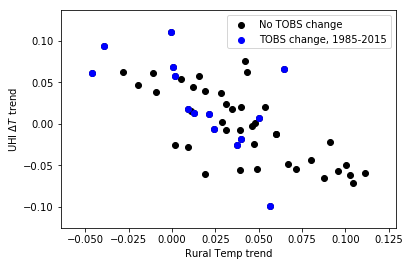

In [279]:
# recreate fig 4, the trend plot, and superimpose the cities with tobs_change
x = trend_resultDF['Annual Temp Slope']
y = trend_resultDF['Annual UHI Slope']
plt.scatter(x,y, color= 'k', label = 'No TOBS change')
plt.scatter(x[tobs_change_cities], y[tobs_change_cities], color = 'blue',label= 'TOBS change, 1985-2015')
plt.legend()
plt.xlabel('Rural Temp trend')
plt.ylabel('$\Delta T$ trend')

In [284]:
trend_resultDF['Annual UHI Slope'].mean(), trend_resultDF['Annual UHI Slope'].loc[no_tobs_change_cities].mean()

(0.004346023919132114, -0.003172086855352578)

(-0.88211123979836559, -0.71005888552847618, 5.9515656053937947e-07)

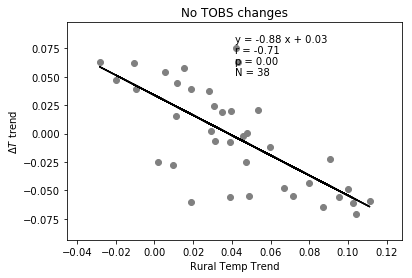

In [281]:
import scipy.stats
x = trend_resultDF['Annual Temp Slope'][no_tobs_change_cities]
y = trend_resultDF['Annual UHI Slope'][no_tobs_change_cities]
hw_scatter(x,y,title='No TOBS changes', xlabel='Rural Temp Trend', ylabel='$\Delta T$ trend')

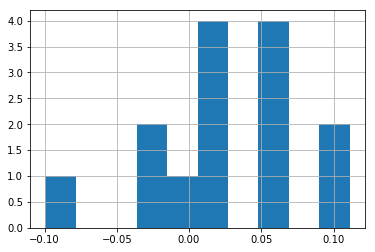

In [242]:
resultsDF['UHI linear trend'].loc[tobs_change_cities].hist()

In [244]:
(resultsDF['UHI linear trend p-value'] < 0.05).sum()

32

In [234]:
resultsDF['UHI linear trend p-value'].loc[tobs_change_cities]#.hist()

City
Tulsa               7.436927e-02
Orlando             9.455100e-05
Jacksonville        1.030404e-01
Baltimore           8.220260e-01
Las Vegas           4.384456e-06
Omaha               1.003177e-11
Oklahoma City       3.049626e-01
Cleveland           1.286236e-11
Cincinnati          2.421335e-16
Minneapolis         4.965487e-03
New Orleans         5.083932e-01
Atlanta             3.903900e-04
Chicago             1.750232e-01
Washington, D.C.    9.146606e-12
Name: UHI linear trend p-value, dtype: float64

In [64]:
switch_times = []
for value in df['Obs_Time'].dropna().unique(): 
    switch_times.append(df['YMD'][df['Obs_Time'] == value].iloc[-1])

In [65]:
switch_times

[19850101]

In [71]:
df.set_index('YMD', drop = False).loc[switch_times][['YMD', 'Obs_Time']].values

array([[  1.98501010e+07,   2.40000000e+03]])

In [55]:
stations = paired_df['Rural station']
num_obs_times = pd.DataFrame(np.ones(stations.shape[0])*np.nan, index = stations.index)

In [ ]:
df['Obs_Time']

In [53]:
df.tail()

,YMD,Obs_Time
11683,20161227,2400.0
11684,20161228,2400.0
11685,20161229,2400.0
11686,20161230,2400.0
11687,20161231,2400.0


In [59]:
df['Obs_Time'].unique().shape[0]

1

In [54]:
2451/60.*100/60.

68.08333333333333

In [43]:
paired_df

,Unnamed: 0,City,Urban station,Urban Lat,Urban Lon,Urban brightness,Urban start,Urban end,Rural station,Rural Lat,Rural Lon,Rural brightness,Rural start,Rural end
City,,,,,,,,,,,,,,
Hartford,11,Hartford,USW00014752,41.736,-72.650,62.0,1920-01-01,2016-09-30,USC00065445,41.972,-73.220,7.0,1884-11-01 00:00:00,2016-10-31
Providence,12,Providence,USW00014765,41.721,-71.432,62.0,1948-01-01,2016-09-30,USC00375270,41.856,-71.733,12.0,1974-10-01,2016-07-31
Birmingham,13,Birmingham,USW00013876,33.565,-86.745,63.0,1930-01-01,2016-09-30,USC00010505,33.452,-87.357,7.0,1957-02-01,2016-07-31
Oakland,16,Oakland,USC00046336,37.798,-122.264,63.0,1970-10-01,2016-10-31,USC00045915,37.879,-121.930,9.0,1952-04-01,2016-09-30
West Palm Beach,17,West Palm Beach,USW00012844,26.684,-80.099,63.0,1938-07-01,2016-09-30,USC00081276,26.863,-80.625,14.0,1953-01-01,2016-10-31
Louisville,18,Louisville,USW00093821,38.181,-85.739,63.0,1948-01-01,2016-09-30,USC00150630,37.916,-85.657,11.0,1970-03-01,2016-10-31
Charlotte,19,Charlotte,USW00013881,35.223,-80.955,63.0,1939-07-01,2016-09-30,USC00314996,35.460,-81.328,13.0,1952-04-01,2016-10-31
Columbus,20,Columbus,USW00014821,39.991,-82.880,63.0,1948-01-01,2016-10-31,USC00331404,40.291,-82.654,10.0,1950-12-01,2016-10-31
Tucson,24,Tucson,USW00023160,32.131,-110.955,63.0,1946-06-01,2016-09-30,USC00020287,31.979,-111.383,4.0,1942-12-01,2016-10-31


In [50]:
paired_df[['Urban station', 'Rural station']].values.flatten().shape

(104,)

In [51]:
104*41/60.

71.06666666666666

In [38]:
df.tail()

,YMD,Obs_Time
11683,20161227,2400.0
11684,20161228,2400.0
11685,20161229,2400.0
11686,20161230,2400.0
11687,20161231,2400.0


In [28]:
station = paired_df['Urban station']['Baltimore']
toc = time.time()
df = pd.read_sql_query("SELECT YMD, Obs_Time, Element FROM 'table' WHERE ID = '%s' LIMIT 1000"%station,
              csv_database)
df1 = df[df['Element']=='TMIN']
tic = time.time()
print(station, ' , ', tic-toc, 'seconds')

USW00093721  ,  43.45092988014221 seconds


In [30]:
df.tail()

,YMD,Obs_Time,Element
930,19850223,2400.0,TMIN
945,19850224,2400.0,TMIN
960,19850225,2400.0,TMIN
976,19850226,2400.0,TMIN
995,19850227,2400.0,TMIN


In [47]:
number_tobs = pd.DataFrame(np.ones(stations.values.flatten().shape[0])*np.nan, index = stations.values.flatten())
number_tobs[station] = df['Obs_Time'].dropna().unique().shape[0]

In [ ]:
obs_times = pd.DataFrameFrame(np.ones(cities.shape, 10)*np.nan)

In [27]:
if df['Obs_Time'].dropna().unique().shape[0] > 1 : 
    # if there is a shift in observation time from 1985-2015
    for value in obsdf['Obs-Time'].dropna().unique(): 
        times.append(obsdf['YMD'][obsdf['Obs-Time'] == value].iloc[0])
else: 

if df['Obs_Time'].dropna().unique().shape[0] > 1:
    times = []
    for value in obsdf['Obs-Time'].dropna().unique(): 
        times.append(obsdf['YMD'][obsdf['Obs-Time'] == value].iloc[0])
    #switch_time = obsdf['Obs-Time'][obsdf['Obs-Time'] < 2400]['YMD'].iloc[0]

outputdf[city].loc['Obs-Times'] = df['Obs_Time'].dropna().unique()
outputdf[city].loc['Dates'] = times

data = obsdf.set_index('YMD', drop = False).loc[times][['YMD', 'Obs-Time']].values.flatten()        
array = np.ones(10)*np.nan
array[0:data.shape[0]] = data
outputdf.loc[station] = array


(1,)

In [ ]:
outputdf = 

In [29]:
toc = time.time()
df = pd.read_sql_query("SELECT YMD, Obs_Time FROM 'table' WHERE ID = '%s' AND Element = 'TMIN' LIMIT 180"%station,
                  csv_database)
print(time.time()-toc)

-309.3735749721527


In [35]:
df.head()

,YMD,Obs_Time
0,19850101,2400.0
1,19850102,2400.0
2,19850103,2400.0
3,19850101,2400.0
4,19850102,2400.0


In [39]:
df['Obs_Time'].dropna().unique()

array([ 2400.])

In [ ]:
pd.read_sql_query("SELECT YMD, Obs_Time FROM 'table' where ID = '%s', Element = 'TMIN', LIMIT 125"%station, csv_database)

In [ ]:
cols = ['ID', 'YMD', 'Element', 'Data value', 'M-flag', 'Q-flag', 'S-flag', 'Obs-Time']
for station in stations.values.flatten()[3:] : 
#     frames = []
#     for year in range(1985,2017) : 
#         df = pd.read_csv('data/'+str(year)+ '.csv')
#         df.columns = cols
#         frames.append(df[(df['ID']== station ) & (df['Element']=='TMIN')])
#         del df
#    obsdf = pd.concat(frames)
    

    obsdf = alldf[(alldf['ID']== station ) & (alldf['Element']=='TMIN')]
    if obsdf['Obs-Time'].dropna().unique().shape[0] > 1:
        times = []
        for value in obsdf['Obs-Time'].dropna().unique(): 
            times.append(obsdf['YMD'][obsdf['Obs-Time'] == value].iloc[0])
        #switch_time = obsdf['Obs-Time'][obsdf['Obs-Time'] < 2400]['YMD'].iloc[0]
        switch_time = times
    else: 
        switch_time = ['19850101']
    data = obsdf.set_index('YMD', drop = False).loc[times][['YMD', 'Obs-Time']].values.flatten()        
    array = np.ones(10)*np.nan
    array[0:data.shape[0]] = data
    outputdf.loc[station] = array
    outputdf.to_csv('stationTOBS.csv')

NameError: name 'df' is not defined

In [17]:
stations.shape

(2, 52)

In [32]:
outputdf.head()

,0,1,2,3,4,5,6,7,8,9
USW00014752,19850101.0,800.0,19900308.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN
USW00014765,19850101.0,2400.0,19900308.0,2400.0,NaN,NaN,NaN,NaN,NaN,NaN
USW00013876,19850101.0,2400.0,19900308.0,2400.0,NaN,NaN,NaN,NaN,NaN,NaN
USC00046336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USW00012844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
outputdf.iloc[0:3, :] = successfuldf


In [27]:
successfuldf = outputdf.iloc[0:3, :]
successfuldf

,0,1,2,3,4,5,6,7,8,9
USW00014752,19850101.0,800.0,19900308.0,730.0,NaN,NaN,NaN,NaN,NaN,NaN
USW00014765,19850101.0,2400.0,19900308.0,2400.0,NaN,NaN,NaN,NaN,NaN,NaN
USW00013876,19850101.0,2400.0,19900308.0,2400.0,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
outputdf.loc[station]

0   NaN
Name: USW00014752, dtype: float64

In [29]:
for station in stations.values.flatten()[3:] : 
    print(station)

USC00046336
USW00012844
USW00093821
USW00013881
USW00014821
USW00023160
USW00093193
USW00023050
USW00013988
USW00013968
USW00013958
USW00023044
USW00012815
USC00084366
USW00093819
USC00444101
USW00093721
USW00023244
USW00023271
USW00023169
USW00024229
USW00024127
USW00014942
USW00013967
USW00012921
USC00317079
USW00014820
USW00093812
USW00013897
USW00013893
USW00013750
USW00014733
USW00094823
USW00014922
USC00519397
USC00458278
USW00023183
USW00023188
USC00237452
USW00012930
USW00013960
USW00012842
USW00023062
USW00012960
USC00083909
USW00013874
USC00111577
USW00093134
USC00186350
USC00065445
USC00375270
USC00010505
USC00045915
USC00081276
USC00150630
USC00314996
USC00331404
USC00020287
USC00040379
USC00299820
USC00143686
USC00347390
USC00413686
USC00294426
USC00081641
USC00082915
USC00128784
USC00448829
USC00182060
USC00045933
USC00043384
USC00262243
USS0023D02S
USC00425892
USC00255362
USC00345779
USC00417215
USC00317656
USC00333780
USC00339361
USC00401663
USC00033821
USC00440385
USC0

see: http://stackoverflow.com/questions/35296935/python-calculate-lots-of-distances-quickly

In [3]:
# subset the GHCN station list with the list of available stations
currentstations = ulmo.ncdc.ghcn_daily.get_stations(start_year=1985, end_year = 2016, elements = ['TMIN', 'TMAX', 'AWND'], as_dataframe=True)
currentGHCNstations = np.intersect1d(currentstations.id, ghcn.index.values) #ghcn['GHCN ID'].values)
ghcnSubset = ghcn.set_index('GHCN ID').loc[currentstations.id.values]

# at this point, ghcn must have the station id set as the index 

In [4]:
ghcn = ghcn.set_index('GHCN ID').loc[currentstations.id.values]

In [5]:
# compute distances between all stations
#tree = scipy.spatial.cKDTree(giss[['lon', 'lat']].values, leafsize=100)
# query the closest point 
#closestInd = tree.query(giss[['lon', 'lat']].values[11,:], k =2, distance_upper_bound=6)[1][1]

In [6]:
atlas = pd.read_csv('data/sampleAtlas.csv') # derived  from http://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/
atlas = pd.read_csv('data/world_cities.csv')
tree = scipy.spatial.cKDTree(ghcn[['lon', 'lat']].values, leafsize=100)
#import sys
#sys.path.append('/../cityheat/Bmore/2015/')
#sys.path.append('/Users/annascott2/mountpoint/cityheat/Bmore/2015/')
#import spatialfunctions
atlas = atlas[atlas['pop']> 500000]

In [7]:
frames = []

for i in range(0, atlas.shape[0]): 
    lat = atlas.iloc[i]['lat']
    lon = atlas.iloc[i]['lng']
    city = atlas.iloc[i]['city']
    # look up the closest k stations within the distance_upper_bound
    closeststations = tree.query([lon,lat], k =15, distance_upper_bound=.5)
    # Make sure the closest stations are within a finite distance
    closestInds = closeststations[1][~np.isinf(closeststations[0])]
    # If there are no stations, skip. Otherwise, 
    if closestInds.shape[0] != 0: 
        # Urban stations are the brightest; return 
        urban = ghcn.Brightness[closestInds].argmax()
        rural = ghcn.Brightness[closestInds].argmin()
        if urban != rural: 
            frames.append([city, ghcn.iloc[closestInds].loc[urban].name, #['GHCN ID'],
                           ghcn.iloc[closestInds].loc[urban]['lat'],
                           ghcn.iloc[closestInds].loc[urban]['lon'],
                           ghcn.Brightness.iloc[closestInds].max(), 

                           ghcn.iloc[closestInds].loc[rural].name, #['GHCN ID'],
                           ghcn.iloc[closestInds].loc[rural]['lat'],
                           ghcn.iloc[closestInds].loc[rural]['lon'],

                           ghcn.Brightness.iloc[closestInds].min()])

pairs = pd.DataFrame(frames, columns = ['City', 'Urban station', 
                                      'Urban Lat', 'Urban Lon','Urban brightness', 
                                      'Rural station', 
                                      'Rural Lat', 'Rural Lon','Rural brightness'])
pairs.to_csv('GHCNpairedstations.csv')

In [8]:
pairs.shape

(244, 9)

In [10]:
pairs[pairs['Urban station'].str.contains('US')].shape

(71, 9)

In [ ]:
# Save out the several station matches 
frames = []

for i in range(0, atlas.shape[0]): 
    lat = atlas.iloc[i]['lat']
    lon = atlas.iloc[i]['lng']
    city = atlas.iloc[i]['city']
    # look up the closest k stations within the distance_upper_bound
    closeststations = tree.query([lon,lat], k =15, distance_upper_bound=.5)
    # Make sure the closest stations are within a finite distance
    closestInds = closeststations[1][~np.isinf(closeststations[0])]
    # If there are no stations, skip. Otherwise, 
    if closestInds.shape[0] != 0: 
        # Urban stations are the brightest; return 
        urban = ghcn.Brightness[closestInds].argmax()
        rural = ghcn.Brightness[closestInds].argmin()
        if urban != rural: 
            frames.append([city, ghcn.iloc[closestInds].loc[urban].name, #['GHCN ID'],
                           ghcn.iloc[closestInds].loc[urban]['lat'],
                           ghcn.iloc[closestInds].loc[urban]['lon'],
                           ghcn.Brightness.iloc[closestInds].max(), 

                           ghcn.iloc[closestInds].loc[rural].name, #['GHCN ID'],
                           ghcn.iloc[closestInds].loc[rural]['lat'],
                           ghcn.iloc[closestInds].loc[rural]['lon'],

                           ghcn.Brightness.iloc[closestInds].min()])

pairs = pd.DataFrame(frames, columns = ['City', 'Urban station', 
                                      'Urban Lat', 'Urban Lon','Urban brightness', 
                                      'Rural station', 
                                      'Rural Lat', 'Rural Lon','Rural brightness'])
pairs.to_csv('GHCNpairedstations.csv')

In [18]:
# calculate the brightness index for all stations
from osgeo import ogr, osr
import os
from shapely.geometry import Point
import shapely.geometry
import shapely.wkt
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import gdal

# rasterfile = 'data/F182013.v4/F182013.v4c_web.stable_lights.avg_vis.tif'
# layer = gdal.Open(rasterfile)
# gt =layer.GetGeoTransform()
# bands = layer.RasterCount
# src = layer.GetRasterBand(1)
X = ghcnSubset['lon']
Y = ghcnSubset['lat']

In [13]:
2015-30

1985

In [19]:
#rasterfile = 'data/F182013.v4/F182013.v4c_web.stable_lights.avg_vis.tif'
rasterfile = 'data/F182013.v4/F182013.v4c_web.avg_vis.tif'
layer = gdal.Open(rasterfile)
gt =layer.GetGeoTransform()
bands = layer.RasterCount
src = layer.GetRasterBand(1)

BI = np.zeros(X.shape)
i = 0 
for x,y in zip(X,Y): 
    rasterx = int((x - gt[0]) / gt[1])
    rastery = int((y - gt[3]) / gt[5])
    BI[i] = src.ReadAsArray(rasterx,rastery, win_xsize=1, win_ysize=1)
    i = i+1

#np.save('brightnessGHCNsubset.npy', BI)
#BI = np.load('data/brightnessGHCN.npy')

AttributeError: 'NoneType' object has no attribute 'GetGeoTransform'